In [1]:
cd

C:\Users\User


In [2]:
import pandas as pd
import numpy as np
from itertools import product # iterative combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import *
from sklearn.cluster import KMeans
from tslearn.clustering import *

from statsmodels import datasets
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [3]:
test=pd.read_csv('./Desktop/kaggle_semi_project/test.csv')
train1=pd.read_csv('./Desktop/kaggle_semi_project/sales_train.csv')
item_cat=pd.read_csv('./Desktop/kaggle_semi_project/item_categories.csv')
items=pd.read_csv('./Desktop/kaggle_semi_project/items.csv')
shops=pd.read_csv('./Desktop/kaggle_semi_project/shops.csv')
sample_sub=pd.read_csv('./Desktop/kaggle_semi_project/sample_submission.csv')

In [4]:
train = pd.read_csv('./Desktop/csv/df6.csv')

<AxesSubplot:xlabel='item_price'>

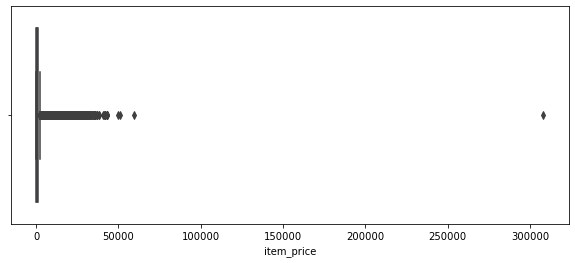

In [5]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)

In [6]:
train=train[train['item_price']<100000]

In [7]:
train=train.drop('Unnamed: 0',axis=1)

<AxesSubplot:xlabel='item_cnt_day'>

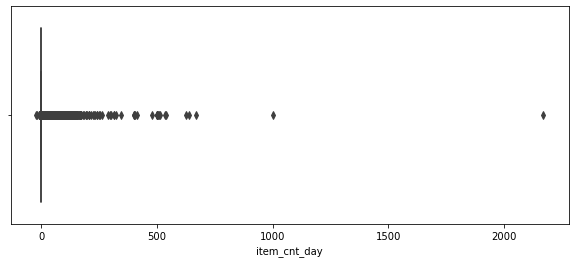

In [8]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)

In [9]:
train=train[train['item_cnt_day']<1000]

In [10]:
train=train[train['item_cnt_day']>=0]

In [11]:
train=train[train['item_price']>= 0]

In [12]:
train.head()

,date,shop_id,item_category_id,date_block_num,item_id,item_price,item_cnt_day,year_month,year,month,day,weekday,weekend,sale_day,item_category_name,item_name,km_cluster,shop_cluster,cnt_month
0,2013-01-01,2,40,0,8665,299.0,1.0,2013-01,2013,1,1,1,0,299.0,Кино - DVD,БАРБОСКИНЫ ВЫПУСК 5: УЧЕНИК ЧАРОДЕЯ,1,3,1.0
1,2013-01-01,54,2,0,5641,2390.0,1.0,2013-01,2013,1,1,1,0,2390.0,Аксессуары - PS3,PS3: Контроллер игровой беспроводной синий (Du...,0,2,7.0
2,2013-01-01,54,2,0,5635,2390.0,1.0,2013-01,2013,1,1,1,0,2390.0,Аксессуары - PS3,PS3: Контроллер игровой беспроводной серебрист...,0,2,2.0
3,2013-01-01,54,2,0,5574,699.0,1.0,2013-01,2013,1,1,1,0,699.0,Аксессуары - PS3,PS Move Navigation Controller (Дополнительный ...,0,2,3.0
4,2013-01-01,54,2,0,5572,1590.0,2.0,2013-01,2013,1,1,1,0,3180.0,Аксессуары - PS3,PS Move Motion Controller (Контроллер движений...,0,2,14.0


In [13]:
shops['city']=shops['shop_name'].str.split(' ').map(lambda x: x[0])

In [14]:
shops['city'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder   #도시는 같지만 다른 상점이기떄문에 values로 라벨인코딩함
lb = LabelEncoder()
lb.fit(list(shops['city'].values))
shops['city'] = lb.transform(list(shops['city'].values))

In [16]:
shops.drop(['shop_name'],axis=1,inplace=True) # 도시이름은 문자열로 드롭해줌

In [17]:
len(test)

214200

In [18]:
len(set(test.item_id) - set(train.item_id))

363

In [19]:
train[train.date_block_num==0]

,date,shop_id,item_category_id,date_block_num,item_id,item_price,item_cnt_day,year_month,year,month,day,weekday,weekend,sale_day,item_category_name,item_name,km_cluster,shop_cluster,cnt_month
0,2013-01-01,2,40,0,8665,299.0,1.0,2013-01,2013,1,1,1,0,299.0,Кино - DVD,БАРБОСКИНЫ ВЫПУСК 5: УЧЕНИК ЧАРОДЕЯ,1,3,1.0
1,2013-01-01,54,2,0,5641,2390.0,1.0,2013-01,2013,1,1,1,0,2390.0,Аксессуары - PS3,PS3: Контроллер игровой беспроводной синий (Du...,0,2,7.0
2,2013-01-01,54,2,0,5635,2390.0,1.0,2013-01,2013,1,1,1,0,2390.0,Аксессуары - PS3,PS3: Контроллер игровой беспроводной серебрист...,0,2,2.0
3,2013-01-01,54,2,0,5574,699.0,1.0,2013-01,2013,1,1,1,0,699.0,Аксессуары - PS3,PS Move Navigation Controller (Дополнительный ...,0,2,3.0
4,2013-01-01,54,2,0,5572,1590.0,2.0,2013-01,2013,1,1,1,0,3180.0,Аксессуары - PS3,PS Move Motion Controller (Контроллер движений...,0,2,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115684,2013-01-31,54,30,0,3325,799.0,1.0,2013-01,2013,1,31,3,0,799.0,Игры PC - Стандартные издания,"FIFA 13 [PC, русская версия]",1,2,16.0
115685,2013-01-31,54,30,0,4723,299.0,1.0,2013-01,2013,1,31,3,0,299.0,Игры PC - Стандартные издания,Mafia II,1,2,4.0
115686,2013-01-31,54,40,0,19811,349.0,1.0,2013-01,2013,1,31,3,0,349.0,Кино - DVD,ТРИ БОГАТЫРЯ НА ДАЛЬНИХ БЕРЕГАХ,1,2,59.0
115687,2013-01-31,54,30,0,1800,274.5,1.0,2013-01,2013,1,31,3,0,274.5,Игры PC - Стандартные издания,"Batman: Аркхем Сити (с поддержкой 3D) [PC, Jew...",1,2,3.0


In [59]:
from itertools import product

matrix=[]
cols = ['date_block_num','shop_id','item_id']
for i in range(34):
    sales = train[train.date_block_num==i]
    matrix.append(np.array(list(product([i],sales.shop_id.unique(),sales.item_id.unique())),dtype='int16'))
matrix

[array([[    0,     2,  8665],
        [    0,     2,  5641],
        [    0,     2,  5635],
        ...,
        [    0,     1, 14544],
        [    0,     1,  8381],
        [    0,     1, 10530]], dtype=int16),
 array([[    1,    15, 11119],
        [    1,    15, 19813],
        [    1,    15,  9905],
        ...,
        [    1,     2,  3981],
        [    1,     2,  7160],
        [    1,     2,  3907]], dtype=int16),
 array([[    2,    31, 12543],
        [    2,    31,  1905],
        [    2,    31, 12541],
        ...,
        [    2,    21, 19318],
        [    2,    21, 10858],
        [    2,    21, 15852]], dtype=int16),
 array([[    3,    57,  4241],
        [    3,    57, 14009],
        [    3,    57, 14574],
        ...,
        [    3,    59,  7184],
        [    3,    59,  5417],
        [    3,    59,  5122]], dtype=int16),
 array([[    4,    54, 12331],
        [    4,    54, 11980],
        [    4,    54,  8796],
        ...,
        [    4,    58,  3905],
       

In [60]:
matrix = pd.DataFrame(np.vstack(matrix),columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols,inplace=True)

In [61]:
matrix.head(3)

,date_block_num,shop_id,item_id
355415,0,0,19
351746,0,0,27
351253,0,0,28


In [25]:
sales = train[train.date_block_num ==1]

In [27]:
sales.shop_id.unique()

array([15, 42,  7, 54, 21, 18, 22, 29,  6, 19,  4, 14, 32,  1, 31, 47, 51,
       46, 38, 41,  8, 52, 35, 50, 59, 10, 23, 28, 26, 27,  0, 24, 53, 13,
       25, 37, 12, 45, 44, 43, 30, 16,  3, 56,  5,  2], dtype=int64)

In [62]:
group = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day':['sum']})
group.columns = ['item_cnt_month']

group.reset_index(inplace=True)
group

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1608219,33,59,22087,6.0
1608220,33,59,22088,2.0
1608221,33,59,22091,1.0
1608222,33,59,22100,1.0


In [39]:
matrix

,date_block_num,shop_id,item_id
355415,0,0,19
351746,0,0,27
351253,0,0,28
353528,0,0,29
348873,0,0,32
...,...,...,...
10756124,33,59,22162
10756049,33,59,22163
10755457,33,59,22164
10757519,33,59,22166


In [63]:
matrix = pd.merge(matrix,group,on=cols,how='left')


In [64]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,NaN
1,0,0,27,NaN
2,0,0,28,NaN
3,0,0,29,NaN
4,0,0,32,6.0


In [65]:
matrix['item_cnt_month'] = (matrix['item_cnt_month']
                           .fillna(0)
                           .astype(np.float16)  )

In [66]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)

In [67]:
test.head()

,shop_id,item_id,date_block_num
ID,,,
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34


In [68]:
matrix = pd.concat([matrix,test],ignore_index=True,sort=False, keys=cols)
matrix.fillna(0,inplace=True)

In [69]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0
